<a href="https://colab.research.google.com/github/Jakhongir0103/ML-DL_projects/blob/main/Pneumonia_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import fastai
import torch
from pathlib import Path
from fastai.vision.all import *
from ipywidgets import widgets

print(fastai.__version__)
print(torch.__version__)

2.7.9
1.12.1+cu113


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c pnevmoniya
! unzip /content/pnevmoniya.zip

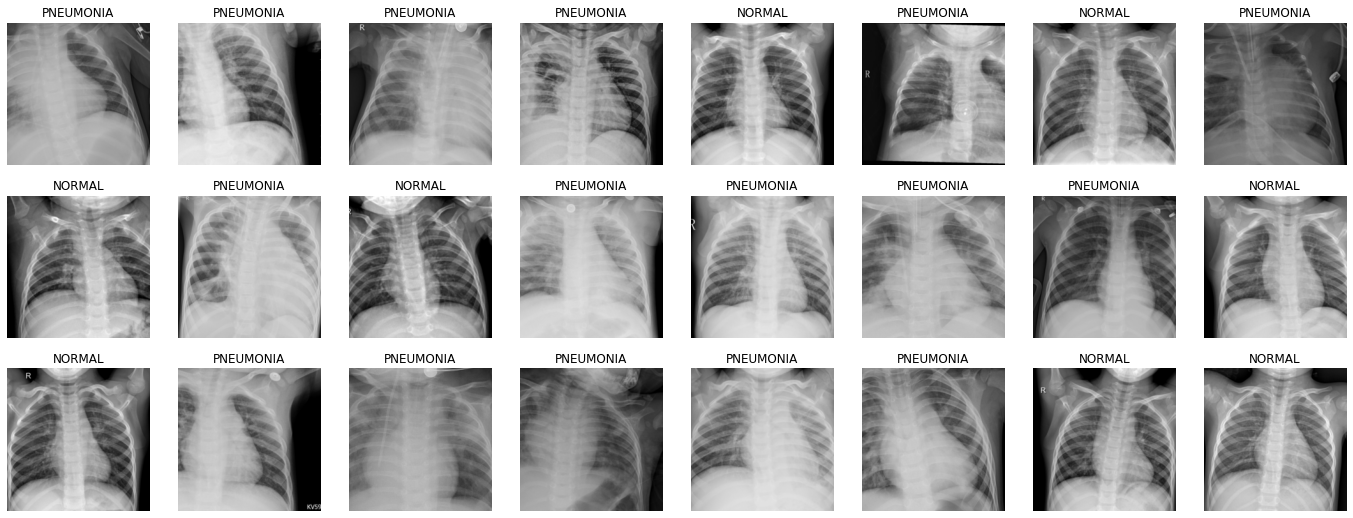

In [27]:
# path
path = Path('/content/train')

# datablock
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms = Resize(224)
)

# dataloader
dls = db.dataloaders(path)

# visualize the data
dls.train.show_batch(max_n=24, nrows=3)

In [28]:
# train
pn_model = cnn_learner(dls=dls, metrics=accuracy, arch=resnet34)
pn_model.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.488205,0.264963,0.918504,01:41


epoch,train_loss,valid_loss,accuracy,time
0,0.129230,0.116612,0.970278,01:33
1,0.091740,0.085211,0.972196,01:32
2,0.055311,0.056285,0.983701,01:31
3,0.025271,0.046561,0.984660,01:31


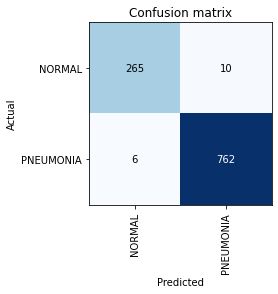

In [29]:
# evaluation
interp = ClassificationInterpretation.from_learner(pn_model)
interp.plot_confusion_matrix()

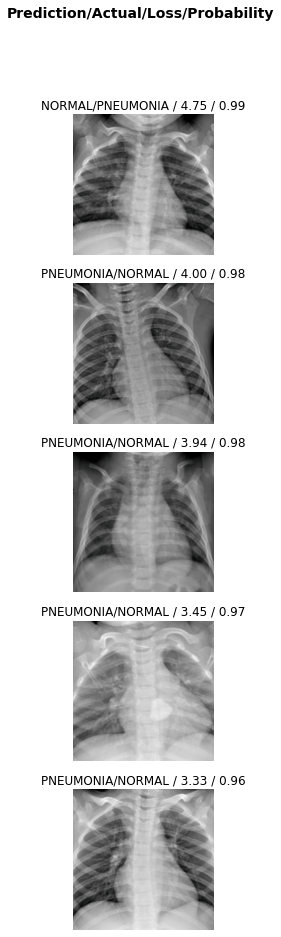

In [89]:
interp.plot_top_losses(5, nrows=5)

In [75]:
# predict
test_images = Path("/content/test").glob('*')
prediction = {img.name : pn_model.predict(PILImage.create(img))[1].item() for img in test_images}

In [88]:
# save
output = pd.DataFrame({'Id':prediction.keys(), 'labels':prediction.values()})
output.to_csv('submission.csv', index=False)